# Proyecto segundo parcial: K Means vs Arboles de decisión
_Odalys Yamilet Pimentel Juárez_

_Semestre: 2025-B_

_Aprendizaje máquina_

## Introducción
El estudio de la salud mental ha tomado una gran importancia en los útltimos años, por lo que se han desarrollado modelos de predicción para ayudar a detectar los principales factores que influyen negativa o positivamente en ella, como pudieran ser: los niveles de estrés, ansiedad y depresión, las horas de sueño y el historial de enfermedades mentales, etc.. 

En este reporte se exploran y contrastan el uso de técnicas de machine learning: K vecinos mas cercanos y árboles de decisión; para la observación y evaluación del desempeño de cada uno en el estudio del riesgo de la salud mental. 

Este análisis busca consolidar los conocimientos adquiridos durante el curso de Aprendizaje Automáticos demostrando su aplicabilidad en contextos reales. 

## Datos
El conjunto de datos utilizado es una simulación sintética proveniente de un estudio de diez mil individuos, se creó para reflejar patrones actuales sin poner en riesgo la privacidad de los encuestados. 

(Link: https://www.kaggle.com/datasets/mahdimashayekhi/mental-health)

In [140]:
##Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [124]:
# Leemos el dataset: 
df=pd.read_csv('mental_health_dataset.csv', index_col=0)

In [125]:
#Muestra de información sobre el df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 56 to 44
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  10000 non-null  object 
 1   employment_status       10000 non-null  object 
 2   work_environment        10000 non-null  object 
 3   mental_health_history   10000 non-null  object 
 4   seeks_treatment         10000 non-null  object 
 5   stress_level            10000 non-null  int64  
 6   sleep_hours             10000 non-null  float64
 7   physical_activity_days  10000 non-null  int64  
 8   depression_score        10000 non-null  int64  
 9   anxiety_score           10000 non-null  int64  
 10  social_support_score    10000 non-null  int64  
 11  productivity_score      10000 non-null  float64
 12  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [126]:
# Revisamos rápidamente si existen valores nulos en el dataframe
conteo_nulos_por_columna = df.isnull().sum()
print("\nNúmero de valores nulos por columna:")
print(conteo_nulos_por_columna)


Número de valores nulos por columna:
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64


### Selección de la variable objetivo

Para la construcción del modelo, se seleccionó como variable objetivo la característica 'mental_health_risk', ya que esta columna nos podría indicar si la salud mental del paciente está en un riesgo 'Bajo', 'Medio' o 'Alto'. 

In [127]:
#Etiquetas de la variable objetivo
print(df['mental_health_risk'].unique()) 

['High' 'Medium' 'Low']


## K Nearest Neighbors
KNN es un algoritmo basado en la instancia o aprendizaje perezoso. No construye un modelo explícito sino que para predecir un la clase de un nuevo punto examina los K puntos más cercanos y asigna la clase mayoritaria entre ellos. El rendimiento de esta técnica depende de la elección de K, la métrica de distancia y la escala de las características

En la siguiente celda se convierten las varibales categóricas a variabñes (ficticias) indicadoras para poder manipular la información con K vecinos, ya que KNN solo trabaja con entradas nunéricas.

In [128]:
X_all = df.drop('mental_health_risk', axis=1)
y=df['mental_health_risk']
df_encoded = pd.get_dummies(X_all, columns=['employment_status', 'gender', 'work_environment', 'mental_health_history','seeks_treatment'])

In [129]:
#Normalizamos las variables descriptivas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

### Valor de K óptimo
Para calcular el valor de K óptimo usamos el método del codo que consiste en elegir el número de clusters justo donde la gráfica forma un "codo" o una esquina. 

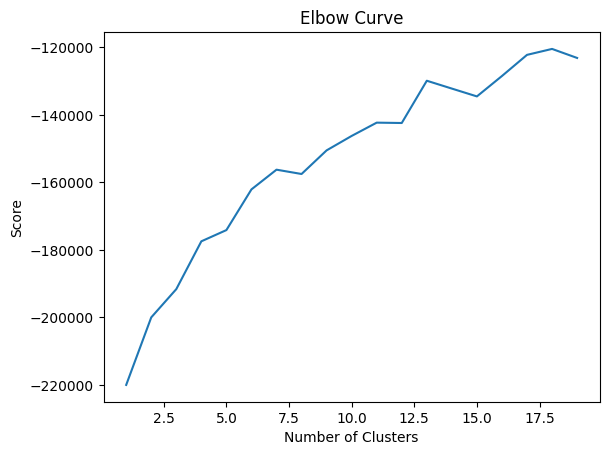

In [130]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Ajuste de la técnica KNN 
En la primera linea se realiza una separacionde datos de entrenamiento y otra de prueba, posteriormente se le asigna un K=8 

In [131]:

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_all = KNeighborsClassifier(n_neighbors=8)
knn_all.fit(X_train_all, y_train_all)
y_pred_all = knn_all.predict(X_test_all)


### Exactitud (accuracy) de KNN

In [132]:
acc_all = accuracy_score(y_test_all, y_pred_all)
print("Accuracy con todas las variables:", acc_all)


Accuracy con todas las variables: 0.815


## Árbol de decisión
Un árbol de decisiones crea una representación jeráquica y basada en reglas de los datos, aprende a dividir el espacio de las características en regiones rectángulares. El rendimiento de esta técnica se basa en la profundidad óptima para crear reglas detalladas. 

In [133]:
X_arbol_train,X_arbol_prueba,y_arbol_train,y_arbol_prueba=train_test_split(X_scaled,y,test_size=0.2,random_state=24)
arbol = tree.DecisionTreeClassifier(max_depth=4)

### Ajuste del modelo: Arbol de decisión

In [134]:
arbol.fit(X_arbol_train,y_arbol_train)

DecisionTreeClassifier(max_depth=4)

In [135]:
# Predecir con los datos de prueba
y_arbol_pred = arbol.predict(X_arbol_prueba)

### Exactitud (accuracy) del árbol de decisión

In [136]:
arbol.score(X_test_all,y_test_all)

0.9175

### Visualización

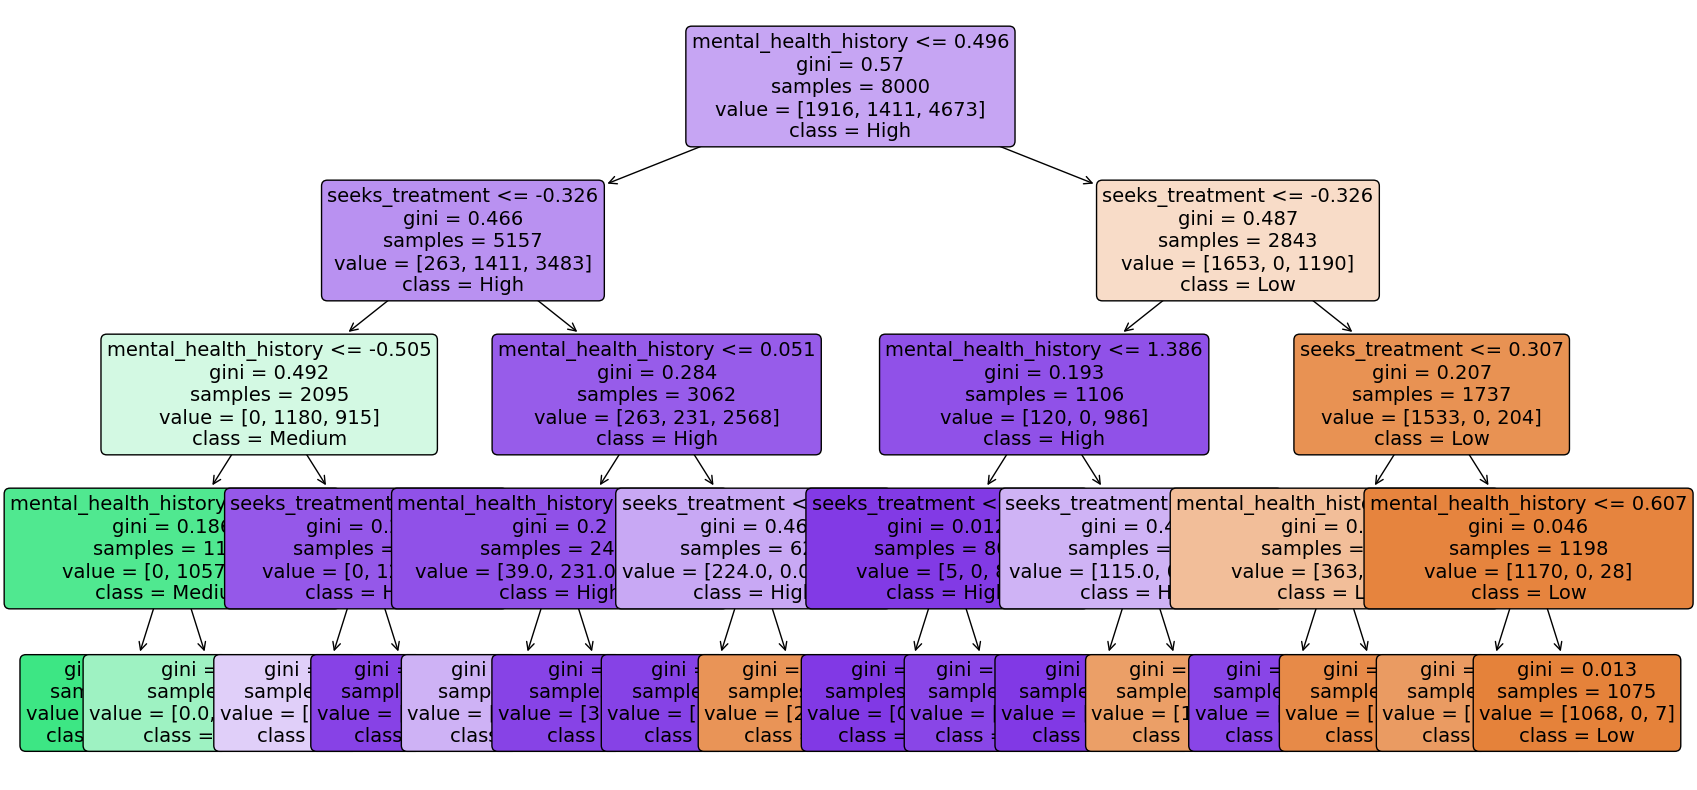

In [137]:
plt.figure(figsize=(20,10))  # Aumenta el tamaño de la figura
plot_tree(
    arbol,
    feature_names=X_all.columns,        # Si usas un DataFrame
    class_names=['Low','Medium', 'High'],  # Etiquetas de las clases
    filled=True,                    # Colores para distinguir clases
    rounded=True,                   # Bordes redondeados
    fontsize=14                     # Fuente legible
)
plt.show()


## Discusión: ¿Qué modelo es mejor?

In [138]:
### KNN
# Reporte de clasificación
print("Reporte de Clasificación de KNN:")
print(classification_report(y_test_all, y_pred_all))

Reporte de Clasificación de KNN:
              precision    recall  f1-score   support

        High       0.83      0.75      0.79       475
         Low       0.83      0.63      0.72       359
      Medium       0.81      0.90      0.85      1166

    accuracy                           0.81      2000
   macro avg       0.82      0.76      0.79      2000
weighted avg       0.82      0.81      0.81      2000



In [139]:
### KNN
# Reporte de clasificación
print("Reporte de Clasificación de árbol de decisión:")
print(classification_report(y_arbol_prueba, y_arbol_pred))

Reporte de Clasificación de árbol de decisión:
              precision    recall  f1-score   support

        High       0.94      0.94      0.94       453
         Low       0.91      0.70      0.79       328
      Medium       0.90      0.96      0.93      1219

    accuracy                           0.91      2000
   macro avg       0.92      0.87      0.89      2000
weighted avg       0.91      0.91      0.91      2000



Se observó que ambas técnicas tuvieron un buen desempeño, por otro lado la diferencia entre la precisión del entrenamiento es notable siendo que el modelo del árbol de decisión supera al de K Vecinos Más Cercanos y esto se debe a:

Los árboles de decisión permiten entradas categóricas y numéricas mientras que para KNN fue necesario codificar las variables categóricas e introducirlas al modelo, esto puede afectar la métrica de distancia que implicaría una mala interpretación de las relaciones importantes. 

Es importante resaltar que debido a la combinación de múltiples divisiones de los árboles de decisión resulta más sencillo adaptarse a las fronteras irregulares de los datos, contrario a lo que sucede con las gráficas de dispersion de KNN, las fronteras no son diferenciadas de una forma clara y la decisión de si pertenece a una clase u otra se basa únicamente en la distancia entre los puntos. 

Cabe mencionar que mientras evaluamos KNN estamos evaluando todas las características, el espacio entre los puntos se distorsiona y esto podría agregar ruido e irrelevancia al modelo. Por otro lado el árbol de decisiones selecciona las características más informativas e influenciables sobre el riesgo de la salud mental, en este caso 'mental_health_history' y 'seeks_treatment'.

Finalmente el reporte de clasificación apunta a que el modelo de árbol de decisiones tiene una precisón de 0.91, con un alto rendimiento para las clases 'High' y 'Medium' mientras que para 'Low' con un *recall* de 0.7 indica que el modelo podría tener dificultades para identificar estos casos. Sin embargo el reporte de clasificacion de KNN mostró una exactitud todavía mas baja en general y sobre todo para la clase 'Low', 0.83, y un *recall* de 0.63 lo que indica que el primer modelo sería mas preciso detectando los casos 'Low' lo cuál es importante si se deseara preveer la salud de los usuarios. 